In [1]:
import numpy as np
import pandas
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from scipy import ndimage
from skimage import measure

In [2]:
dataf = pandas.read_csv(r'letter-recognition.csv')

In [3]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
dataf.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
help_ar = []
for i in range(len(dataf["letter"])):
    help_ar.append(ord(dataf["letter"][i])-64)
#y = help_ar
#dataf.pop("letter")
y = dataf.pop("letter")
#dataf.info()


In [6]:
scaler = MinMaxScaler()
scaler.fit(dataf)
dataf = pandas.DataFrame(scaler.transform(dataf),columns=dataf.columns)
#y = dataf.pop("letter")
x = dataf
dataf.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.268237,0.469033,0.341457,0.358163,0.233723,0.459840,0.500030,0.308573,0.345243,0.552137,0.430267,0.528600,0.203073,0.555923,0.246117,0.520080
std,0.127547,0.220304,0.134305,0.150759,0.146031,0.135069,0.155024,0.179998,0.158722,0.165898,0.175405,0.138708,0.155503,0.103115,0.171138,0.107831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.333333,0.266667,0.266667,0.133333,0.400000,0.400000,0.200000,0.266667,0.466667,0.333333,0.466667,0.066667,0.533333,0.133333,0.466667
50%,0.266667,0.466667,0.333333,0.400000,0.200000,0.466667,0.466667,0.266667,0.333333,0.533333,0.400000,0.533333,0.200000,0.533333,0.200000,0.533333
75%,0.333333,0.600000,0.400000,0.466667,0.333333,0.533333,0.600000,0.400000,0.466667,0.666667,0.533333,0.600000,0.266667,0.600000,0.333333,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

C:\Users\Jakub\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of samples')

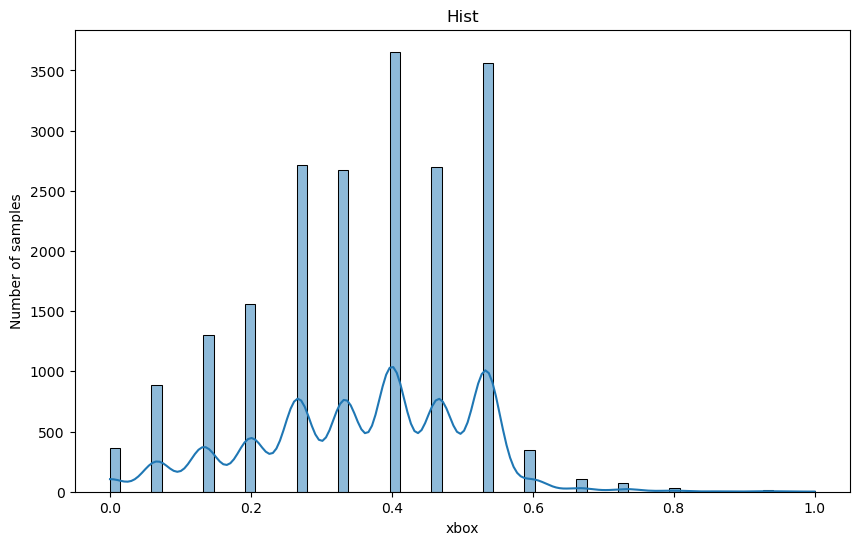

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(dataf["height"], kde = True)
plt.title("Hist")
plt.xlabel('xbox')
plt.ylabel('Number of samples')
#plt.show()

In [9]:
#wyglada brzydko, ale za to nie dziala xd

def tl(filepath):
    img = Image.open(filepath)
    img_gs = img.convert("L")
    np_img = np.array(img_gs)
    on_pixels = np.where(np_img<255)
    on_pixels = np.array(on_pixels).T #added later
#those seem legit
    x_box = np.min(on_pixels[:, 1]) / np_img.shape[1]
    y_box = np.min(on_pixels[:, 0]) / np_img.shape[0]
    width = (np.max(on_pixels[:, 1]) - np.min(on_pixels[:, 1])) / np_img.shape[1]
    height = (np.max(on_pixels[:, 0]) - np.min(on_pixels[:, 0])) / np_img.shape[0]
    onpix = len(on_pixels) / (np_img.shape[0] * np_img.shape[1])
#versions according to an article
    x_bar = (np.mean(on_pixels[:, 1]) - (np.min(on_pixels[:, 1]) + 0.5*width)) / width
    y_bar = (np.mean(on_pixels[:, 0]) - (np.min(on_pixels[:, 0]) + 0.5*height)) / height
    print(x_bar)
    print(y_bar)
    #x2bar = 


    
    x_bar = np.mean(on_pixels[:, 1]) / np_img.shape[1]
    y_bar = np.mean(on_pixels[:, 0]) / np_img.shape[0]
    x2bar = np.var(on_pixels[:, 1]) / (np_img.shape[1] ** 2)
    y2bar = np.var(on_pixels[:, 0]) / (np_img.shape[0] ** 2)
    xybar = np.mean(on_pixels[:, 0] * on_pixels[:, 1]) / (np_img.shape[0] * np_img.shape[1])
    x2ybar = np.mean(on_pixels[:, 1] ** 2 * on_pixels[:, 0]) / (np_img.shape[1] ** 2 * np_img.shape[0])
    xy2bar = np.mean(on_pixels[:, 1] * on_pixels[:, 0] ** 2) / (np_img.shape[1] * np_img.shape[0] ** 2)
#those are sussy
    sobel_x = ndimage.sobel(np_img, axis=1, mode='constant')
    sobel_y = ndimage.sobel(np_img, axis=0, mode='constant')
    xedge = np.sum(sobel_x > 0) / (np_img.shape[0] * np_img.shape[1])
    yedge = np.sum(sobel_y > 0) / (np_img.shape[0] * np_img.shape[1])
    #xedgey = 
    #yedgex = 
    edges_x = np.diff(np_img, axis=1)
    edges_y = np.diff(np_img, axis=0)
    edge_count_x = np.sum(edges_x > 0, axis=1) / np_img.shape[1]
    edge_count_y = np.sum(edges_y > 0, axis=0) / np_img.shape[0]
# Calculate the means of x and y coordinates
    mean_x = np.mean(on_pixels[:, 1])
    mean_y = np.mean(on_pixels[:, 0])
# Calculate the standard deviations of x and y coordinates
    mean_y_per_row = [np.mean(on_pixels[on_pixels[:, 0] == i, 1]) if i in on_pixels[:, 0] else 0 for i in range(np_img.shape[0])]
    mean_x_per_col = [np.mean(on_pixels[on_pixels[:, 1] == i, 0]) if i in on_pixels[:, 1] else 0 for i in range(np_img.shape[1])]
# Calculate the correlations
    x_ege = np.corrcoef(edge_count_x, mean_y_per_row)[0, 1]
    y_ege = np.corrcoef(edge_count_y, mean_x_per_col)[0, 1]
# Normalize to the range [0, 1]
    xedgey = (x_ege + 1) / 2
    yedgex = (y_ege + 1) / 2
    return [x_box, y_box, width, height, onpix, x_bar, y_bar, x2bar, y2bar, xybar, x2ybar, xy2bar, xedge, x_ege, yedge, y_ege]

In [10]:
#dodatkowe funckje pomocnice dla tl2

def xed(np_img):
    edge_count = 0
    for row in np_img:
        prev_pixel=0
        for pixel in row:
            if pixel < 255 and prev_pixel == 255:
                edge_count += 1
            prev_pixel = pixel
        if prev_pixel < 255: #jezeli ostatni pixel jest "on" to doliczam tez krawedz z granica
            edge_count += 1
    return edge_count
            
def yed(np_img):
    edge_count = 0
    for col in np_img.T:
        prev_pixel = 0
        for pixel in reversed(col):
            if pixel < 255 and prev_pixel == 255:
                edge_count += 1
            prev_pixel = pixel
        if prev_pixel < 255: #jezeli ostatni pixel jest "on" to doliczam tez krawedz z granica
            edge_count += 1
    return edge_count

In [11]:
#drugie podejscie do zamiany obrazkow na dane tym razem zgodnie z tym artykulem
def tl2(filepath):
    
    img = Image.open(filepath)
    base_width = 27
    wpercent = (base_width / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)
    
    img_gs = img.convert("L")
    np_img = np.array(img_gs)
    on_pixels = np.where(np_img<255)
    on_pixels = np.array(on_pixels).T #added later

    #tutaj uznalem ze moze lepiej bedzie najpierw policzyc koordynaty wszystkie a potem dopiero je znormalizowac
    xbox = (np.max(on_pixels[:, 1]) - np.min(on_pixels[:, 1])) / 2
    ybox = (np.max(on_pixels[:, 0]) - np.min(on_pixels[:, 0])) / 2
    width = np.max(on_pixels[:, 1]) - np.min(on_pixels[:, 1])
    height = np.max(on_pixels[:, 0]) - np.min(on_pixels[:, 0])
    onpix = len(on_pixels)
    xbar = (np.mean(on_pixels[:, 1]) - (xbox + 0.5*width)) / width
    ybar = (np.mean(on_pixels[:, 0]) - (ybox + 0.5*height)) / height
    
    #zmienne pomocnicze
    xd_square = [] #kwadraty odleglosci od srodka pudelka poziome i pionowe
    yd_square = []
    x_distance = []
    y_distance = []
    xy_distance = []

    x2y_d = []
    xy2_d = []
    for i in range(len(on_pixels[:, 1])):
        xd_square.append((on_pixels[:, 1][i] - (xbox + 0.5*width))**2)
        yd_square.append((on_pixels[:, 0][i] - (ybox + 0.5*height))**2)
        x_distance.append((on_pixels[:, 1][i] - (xbox + 0.5*width)))
        y_distance.append((on_pixels[:, 0][i] - (ybox + 0.5*height)))
        xy_distance.append(x_distance[i] * y_distance[i])
        x2y_d.append(xd_square[i] * y_distance[i])
        xy2_d.append(yd_square[i] * x_distance[i])
    
    x2bar = np.mean(xd_square)
    y2bar = np.mean(yd_square)
    xybar = np.mean(xy_distance)
    x2ybar = np.mean(x2y_d)
    xy2bar = np.mean(xy2_d)
    
    #te cztery jeszcze nie sa zaimplementowane
    xedge = xed(np_img) / np_img.shape[0]
    xedgey = xed(np_img)
    yedge = yed(np_img) / np_img.shape[1]
    yedgex = yed(np_img)
    
    
    return [xbox, ybox, width, height, onpix, xbar, ybar, x2bar, y2bar, xybar, x2ybar, xy2bar, xedge, xedgey, yedge, yedgex]

In [12]:
def norm(df):
    norm_df = df.copy()
    columns_to_normalize = df.columns

    for column in columns_to_normalize:
        min_val = norm_df[column].min()
        max_val = norm_df[column].max()
    
        norm_df[column] = (norm_df[column] - min_val) / (max_val - min_val)
    return norm_df
    


In [13]:
test_mfs = [tl2("letterA.png"), tl2("letterL.png"),tl2("letterB.png"),tl2("letterC.png"),tl2("letterI.png"),tl2("letterM.png")]
df = pandas.DataFrame(test_mfs, columns=x.columns)
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,4.833333,3.666667,16.500000,22.500000,207.500000,-0.045080,0.020275,20.633611,42.456286,1.151180,-17.064040,-14.978467,2.710958,73.166667,1.685185,45.500000
std,2.786874,4.589844,5.540758,2.810694,54.220845,0.064289,0.047107,10.837561,13.295014,2.005037,90.384304,32.511909,1.118574,19.528611,0.878567,23.721298
min,1.000000,0.000000,8.000000,19.000000,144.000000,-0.165675,-0.042019,5.810526,22.865854,-0.504902,-198.008392,-68.690972,1.473684,55.000000,0.259259,7.000000
25%,3.250000,0.250000,14.750000,20.750000,170.500000,-0.055323,0.001923,16.558858,35.614325,0.115854,2.749519,-28.183049,2.028770,59.250000,1.314815,35.500000
50%,4.500000,2.500000,17.000000,23.000000,197.000000,-0.025994,0.010666,19.742201,45.467488,0.679784,13.540705,-9.087100,2.388889,70.000000,1.796296,48.500000
75%,7.250000,4.750000,17.750000,23.000000,246.000000,-0.001860,0.036794,23.245079,46.655637,0.950849,16.123775,5.166528,3.301389,77.750000,2.222222,60.000000
max,8.000000,12.000000,25.000000,27.000000,283.000000,0.006098,0.097826,38.596290,61.555263,5.083333,52.405488,21.625000,4.500000,108.000000,2.740741,74.000000


In [14]:

ndf = norm(df)
ndf.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.547619,0.305556,0.500000,0.437500,0.456835,0.702062,0.445452,0.452120,0.506351,0.296352,0.722581,0.594718,0.408838,0.342767,0.574627,0.574627
std,0.398125,0.382487,0.325927,0.351337,0.390078,0.374270,0.336855,0.330557,0.343634,0.358796,0.360940,0.359980,0.369616,0.368464,0.354049,0.354049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.321429,0.020833,0.397059,0.218750,0.190647,0.642430,0.314218,0.327835,0.329508,0.111083,0.801704,0.448513,0.183420,0.080189,0.425373,0.425373
50%,0.500000,0.208333,0.529412,0.500000,0.381295,0.813176,0.376739,0.424931,0.584181,0.211996,0.844798,0.659948,0.302415,0.283019,0.619403,0.619403
75%,0.892857,0.395833,0.573529,0.500000,0.733813,0.953672,0.563574,0.531772,0.614891,0.260503,0.855113,0.817768,0.603937,0.429245,0.791045,0.791045
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
from sklearn.neighbors import KNeighborsClassifier


best_k = 1
for i in range(1, 100):
    knn_best=KNeighborsClassifier(best_k)
    knn_best.fit(x_train, y_train)
    knn_lib=KNeighborsClassifier(i)
    knn_lib.fit(x_train, y_train)
    
    if(knn_best.score(x_test, y_test) < knn_lib.score(x_test, y_test)):
        best_k = i


knn_lib=KNeighborsClassifier(best_k)
knn_lib.fit(x_train, y_train)
knn_lib.score(x_test, y_test)



0.96

In [16]:
predictions = knn_lib.predict(ndf)
print(predictions)

['Q' 'F' 'W' 'Q' 'Y' 'Q']


<function matplotlib.pyplot.show(close=None, block=None)>

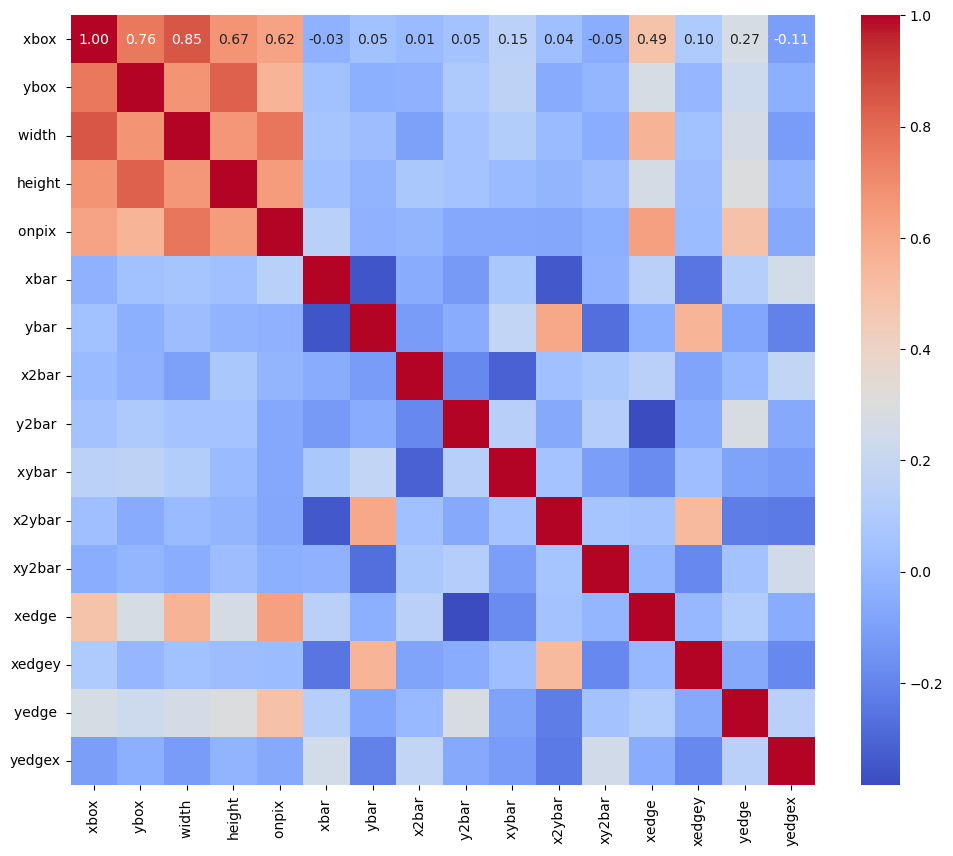

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(dataf.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show

In [18]:
def tltest(filepath):
    img = Image.open(filepath)
    img_gs = img.convert("L")
    np_img = np.array(img_gs)
    on_pixels = np.where(np_img<255)
    on_pixels = np.array(on_pixels).T #added later
    
    print(np_img.shape[0])
    print(np_img.shape[1])

tltest("letterA.png")

56
54
